Search Algorithms + General Function

In [60]:
import matplotlib.pyplot as plt
import heapq
import copy
import time

# allows us to look for neightbors with in the eight puzzle
def get_neighbors(state):
    neighbors = []
    zero_pos = [(r, c) for r in range(3) for c in range(3) if state[r][c] == 0][0] # looks for the position the empty space (0) in the current state.
    row, col = zero_pos
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    # iterate and explores all possible moves within bounds.
    for dr, dc in moves:
        new_r, new_c = row + dr, col + dc
        if 0 <= new_r < 3 and 0 <= new_c < 3:
            new_state = copy.deepcopy(state)
            new_state[row][col], new_state[new_r][new_c] = new_state[new_r][new_c], new_state[row][col]
            neighbors.append((new_state, 1))  # Cost is always 1

    return neighbors


def general_search(start, goal, get_neighbors, heuristic=None):

    # UCS set heuristic to h(n) = 0
    def null_heuristic(state, goal):
        return 0

    heuristic = heuristic or null_heuristic
    priority_queue = [(heuristic(start, goal), 0, start, [])]
    visited = set()
    num_nodes_expanded = 0
    max_queue_size = 0
    logs = []

    #
    while priority_queue:

        # keep track of queue size
        max_queue_size = max(max_queue_size, len(priority_queue))

        # get current node from heap
        _, cost, state, path = heapq.heappop(priority_queue)

        # covert to tuple for easy comparison i.e. fancy edge cases
        state_tuple = tuple(tuple(row) for row in state)

        # skip state if visited
        if state_tuple in visited:
            continue

        # keep track of new nodes
        visited.add(state_tuple)
        num_nodes_expanded += 1
        new_path = path + [state]

        # Traceback
        g_n = cost
        h_n = heuristic(state, goal)
        logs.append((state, g_n, h_n))

        # if goal reached then return data necessary
        if state == goal:
            return new_path, cost, num_nodes_expanded, max_queue_size, logs  # solution found

        # explores all the neighbors in the current state
        for neighbor, move_cost in get_neighbors(state):
            g_n = cost + move_cost
            h_n = heuristic(neighbor, goal)
            heapq.heappush(priority_queue, (g_n + h_n, g_n, neighbor, new_path))

    return None, float("inf"), num_nodes_expanded, max_queue_size, logs # no solution found

# counts the number of misplaced tiles.
def misplaced_tile(state, goal):
    misplaced_count = 0

    # iterates to checks if tiles are in the correct position else adds to counter
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0 and state[i][j] != goal[i][j]:
                misplaced_count += 1
    return misplaced_count

# sums the Manhattan distance for each tile to its goal position.
def manhattan_distance(state, goal):
    distance = 0
    goal_positions = {goal[r][c]: (r, c) for r in range(3) for c in range(3)} # precomputes the positions

    # iterates through each tile in its current state
    for i in range(3):
        for j in range(3):
            tile = state[i][j]
            if tile != 0:
                goal_r, goal_c = goal_positions[tile]
                distance += abs(i - goal_r) + abs(j - goal_c) # computes manhatthan distance

    return distance


### Trigger Function and plot function
### Inital data + Configutations + data collection

    # plotted the graphs
def plot(depths, ucs_data, misplaced_data, manhattan_data, ylabel, title):
    plt.figure(figsize=(10, 5))
    plt.plot(depths, ucs_data, marker='o', label="UCS")
    plt.plot(depths, misplaced_data, marker='s', label="A* (Misplaced Tile)")
    plt.plot(depths, manhattan_data, marker='^', label="A* (Manhattan Distance)")
    plt.xlabel("Puzzle Depth")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def search_and_write_results(puzzle, goal, algorithm_name, heuristic=None):
    start_time = time.time()
    if heuristic:
        path, cost, nodes_expanded, max_queue_size, logs = general_search(puzzle, goal, get_neighbors, heuristic)
    else:
        path, cost, nodes_expanded, max_queue_size, logs = general_search(puzzle, goal, get_neighbors)

    end_time = time.time()
    runtime = end_time - start_time
    runtime_data[algorithm_name].append(runtime)

    # write results to the file
    with open(f'./outp/{algorithm_name.lower().replace(" ", "_")}_{puzzle_name}.txt', 'w') as f:
      for state, g_n, h_n in logs:
            f.write(f"The best state to expand with a g(n) = {g_n} and h(n) = {h_n} \n")
            for row in state:
                f.write(f"{row}\n")
            f.write("\n")

      f.write(f"Solution depth: {len(path) - 1 if path else 'N/A'}, \n"
                f"Number of nodes expanded: {nodes_expanded}, \n"
                f"Max queue size: {max_queue_size}, \n"
                f"Runtime: {runtime:.6f} seconds \n")


    return path, nodes_expanded, max_queue_size


In [65]:
GOAL = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]]

depth0 = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]]

depth2 = [[1, 2, 3],
        [4, 5, 6],
        [0, 7, 8]]

depth4 = [[1, 2, 3],
        [5, 0, 6],
        [4, 7, 8]]

depth8 = [[1, 3, 6],
        [5, 0, 2],
        [4, 7, 8]]

depth12 = [[1, 3, 6],
        [5, 0, 7],
        [4, 8, 2]]

depth16 = [[1, 6, 7],
        [5, 0, 3],
        [4, 8, 2]]

depth20 = [[7, 1, 2],
        [4, 8, 5],
        [6, 3, 0]]

depth24 = [[0, 7, 2],
        [4, 6, 1],
        [3, 5, 8]]

puzzles = {0: depth0, 2: depth2, 4: depth4, 8: depth8, 12: depth12, 16: depth16, 20: depth20, 24:depth24}

# storage data to plot on graphs
ucs_nodes, misplaced_nodes, manhattan_nodes = [], [], []
ucs_queue, misplaced_queue, manhattan_queue = [], [], []
solution_depths = []
runtime_data = {
    "Uniform Cost Search": [],
    "Misplaced Tile": [],
    "Manhattan Distance": []
}

names = [0, 2, 4, 8, 12, 16, 20, 24]


for i, puzzle in puzzles.items():
    print("\nInitial state:")
    for row in puzzle:
        print(row)

    puzzle_name = f"depth{i}"

    # algorithm configurations
    algorithms = [
        ("Uniform Cost Search", None),
        ("Misplaced Tile", misplaced_tile),
        ("Manhattan Distance", manhattan_distance)
    ]

    for algorithm_name, heuristic in algorithms:
        path, nodes_expanded, max_queue_size = search_and_write_results(puzzle, GOAL, algorithm_name, heuristic)

        # collect data for analysis
        if algorithm_name == "Uniform Cost Search":
            solution_depths.append(len(path) - 1 if path else 0)
            ucs_nodes.append(nodes_expanded)
            ucs_queue.append(max_queue_size)
        elif algorithm_name == "A* (Misplaced Tile)":
            misplaced_nodes.append(nodes_expanded)
            misplaced_queue.append(max_queue_size)
        elif algorithm_name == "A* (Manhattan Distance)":
            manhattan_nodes.append(nodes_expanded)
            manhattan_queue.append(max_queue_size)



Initial state:
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]

Initial state:
[1, 2, 3]
[4, 5, 6]
[0, 7, 8]

Initial state:
[1, 2, 3]
[5, 0, 6]
[4, 7, 8]

Initial state:
[1, 3, 6]
[5, 0, 2]
[4, 7, 8]

Initial state:
[1, 3, 6]
[5, 0, 7]
[4, 8, 2]

Initial state:
[1, 6, 7]
[5, 0, 3]
[4, 8, 2]

Initial state:
[7, 1, 2]
[4, 8, 5]
[6, 3, 0]

Initial state:
[0, 7, 2]
[4, 6, 1]
[3, 5, 8]


**Nodes Expanded**

At a depth of 16, we see the three algorithms diverge in terms of the number of nodes expanded. It can be inferred that UCS will always have the largest number of nodes expanded, simply because it lacks a heuristic and, therefore, has no knowledge of where the goal state lies.

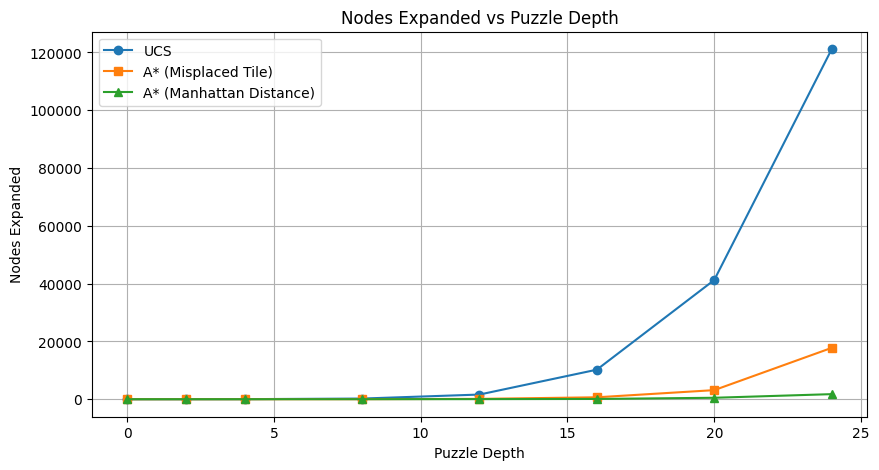

In [64]:
plot(depths, ucs_nodes, misplaced_nodes, manhattan_nodes, "Nodes Expanded", "Nodes Expanded vs Puzzle Depth")

**Max Queue Size**

Manhattan Distance has the lowest queue size, which is expected since it has the strongest heuristic. This is because it contains information necessary to reach the goal state in a straightforward manner, knowing both the tiles and their distance from the goal. While the Misplaced Tiles heuristic performs better than Uniform Cost Search, it still has less information. UCS has no heuristic, so it essentially solves the problem blindly.
After a solution depth of 12, we see UCS begin to struggle significantly, resulting in an increase in the maximum queue size. A similar pattern is observed with Misplaced Tiles at a solution depth of 20, as the puzzles become more complex. We can also assume that after a solution depth of 24, Manhattan Distance will begin to show an increase in its maximum queue size.


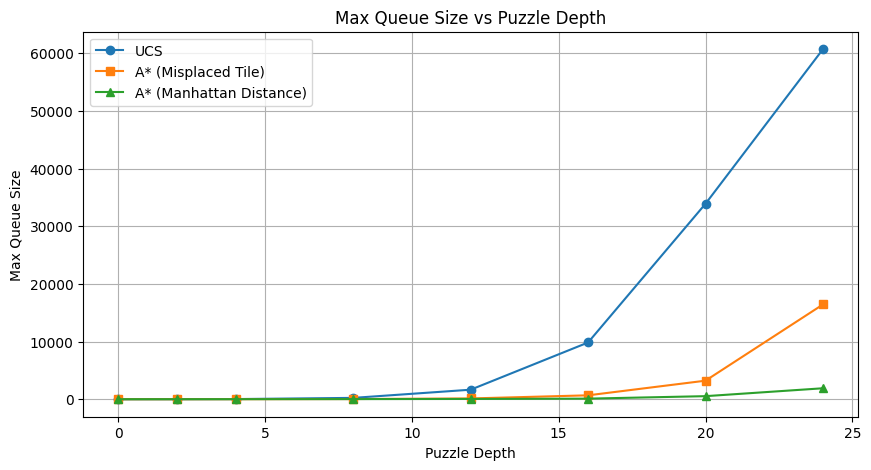

In [31]:
plot(depths, ucs_queue, misplaced_queue, manhattan_queue, "Max Queue Size", "Max Queue Size vs Puzzle Depth")

**Solution Depth**

Most of the times were under two seconds, except for at depth 20 and depth 24. This is because Uniform Cost Search requires more time than both Misplaced Tiles and Manhattan Distance combined, due to the lack of a heuristic. As the depth increases, particularly around depth 12, we observe where UCS and A* begin to diverge in terms of runtime. UCS has more nodes to traverse with the lowest cost in order to reach the goal state.


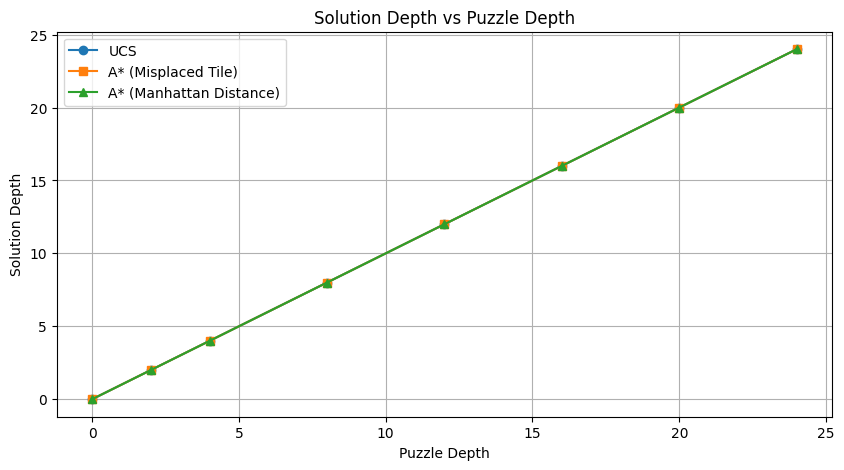

In [67]:
plot(depths, solution_depths, solution_depths, solution_depths, "Solution Depth", "Solution Depth vs Puzzle Depth")

**Runtime**



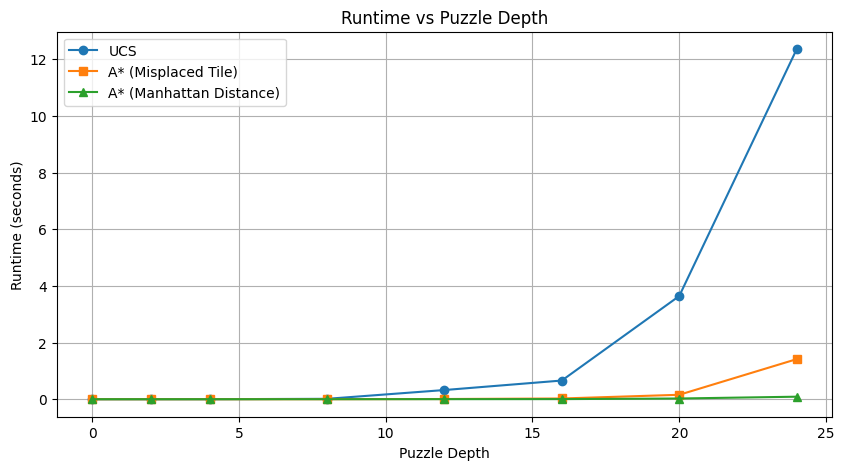

In [70]:
plot(depths, runtime_data["Uniform Cost Search"], runtime_data["Misplaced Tile"], runtime_data["Manhattan Distance"],
     "Runtime (seconds)", "Runtime vs Puzzle Depth")

**3.1**